In [3]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [4]:
(X_train, Y_train), (x_test, y_test) = mnist.load_data()
x_test.shape, y_test.shape

11493376/11490434 [==============================] - 1s 0us/step


((10000, 28, 28), (10000,))

In [9]:
x = x_test.reshape(-1, 28*28)
y = y_test

In [10]:
# Normalization (step-1)
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
x_ = sc.fit_transform(x)

# SKlearn PCA

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [15]:
z_pca = pca.fit_transform(x_)
print(z_pca.shape)
z_pca

(10000, 2)


array([[-5.45830776,  6.41406674],
       [ 2.80442702, -8.02765329],
       [-7.41122977, -3.86449511],
       ...,
       [-5.00440907,  1.15408732],
       [-1.42084685, -4.4228743 ],
       [13.14285982, -4.26785532]])

In [18]:
pca.explained_variance_

array([41.39893397, 28.35105527])

# Custom PCA

In [19]:
import numpy as np

In [21]:
# step-2 Compute covar matrix
covar = np.dot(x_.T,  x_)
covar.shape

(784, 784)

In [22]:
# step-3 Compute Eigen Vectors using SVD
from numpy.linalg import svd

In [25]:
U, S, V = svd(covar)
U.shape
Ured = U[:,:2]
Ured.shape

(784, 2)

In [27]:
# step-4 Projection of data on new axis(components)
z = np.dot(x_, Ured)
z

array([[  5.45831116,  -6.41400668],
       [ -2.80443233,   8.02885014],
       [  7.41124146,   3.86404387],
       ...,
       [  5.00435204,  -1.15364641],
       [  1.42085442,   4.42308066],
       [-13.14268302,   4.26280299]])

In [29]:
var = np.var(z, axis=0)
var

array([41.39479408, 28.34822298])

# Visualize Dataset

In [32]:
import pandas as pd

In [38]:
dataset = np.hstack((z, y_test.reshape(-1,1)))

df = pd.DataFrame(dataset, columns=['PC1', 'PC2', 'label'])
df.head()

,PC1,PC2,label
0,5.458311,-6.414007,7.0
1,-2.804432,8.028850,2.0
2,7.411241,3.864044,1.0
3,-8.751242,-0.045991,0.0
4,0.065756,-6.296290,4.0


<Figure size 1080x1080 with 0 Axes>

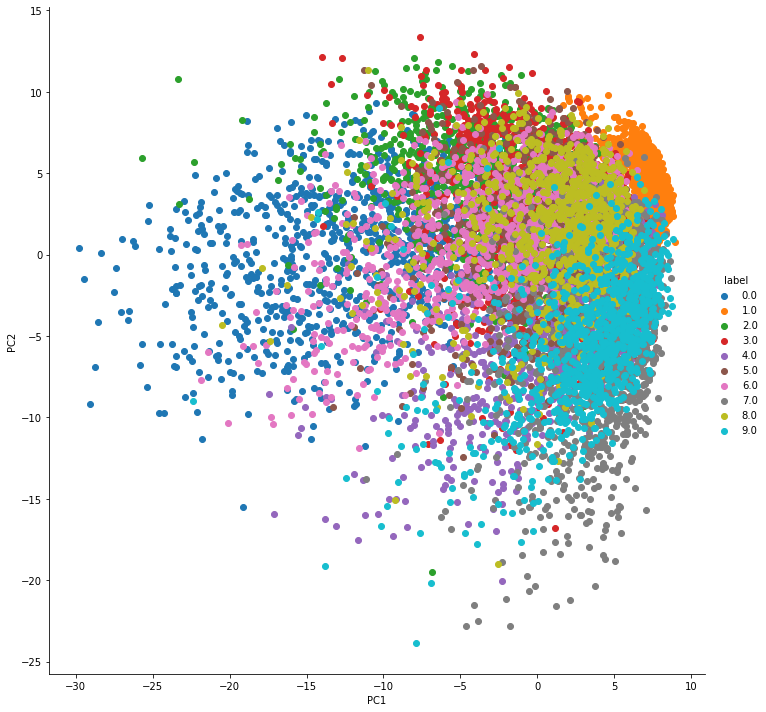

In [40]:
import seaborn as sns
plt.figure(figsize=(15, 15))
fg = sns.FacetGrid(df, hue='label', height=10)
fg.map(plt.scatter, "PC1", "PC2")
fg.add_legend()
plt.show()

C:\Users\samee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


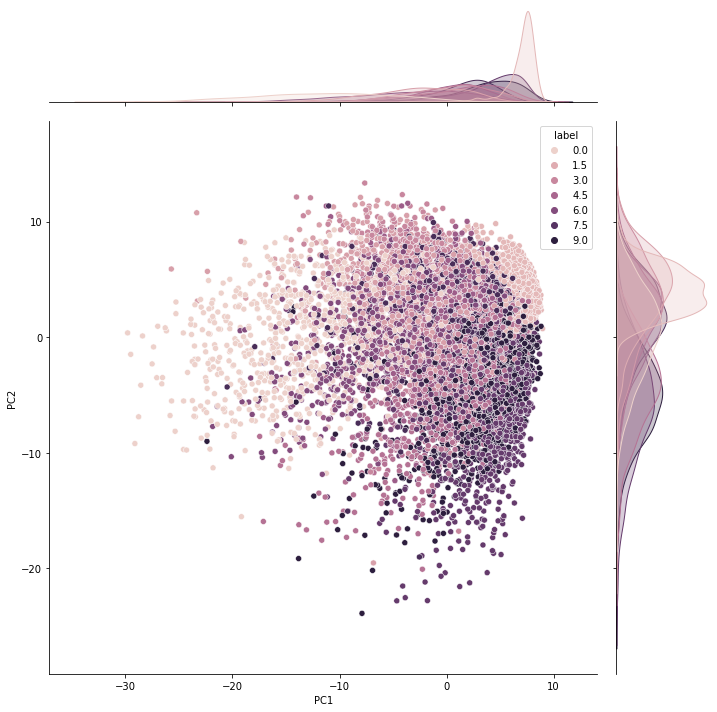

In [46]:
sns.jointplot(df.iloc[:,0], df.iloc[:,1], hue = df['label'], height=10)
plt.show()

# PCA with K = 784

In [49]:
pca = PCA()
z_784 = pca.fit_transform(x_)
z_784.shape

(10000, 784)

In [50]:
cum_var_explained = np.cumsum(pca.explained_variance_ratio_)
cum_var_explained

array([0.06196825, 0.10440571, 0.14485024, 0.17715614, 0.20470687,
       0.22879812, 0.24925102, 0.26808257, 0.28479108, 0.29996633,
       0.31468716, 0.32779648, 0.34034829, 0.35228998, 0.36373924,
       0.37468893, 0.38500726, 0.39494763, 0.4044137 , 0.41352917,
       0.42242401, 0.4310809 , 0.439552  , 0.44776835, 0.45563324,
       0.46333726, 0.47090331, 0.47823448, 0.48532264, 0.49215733,
       0.49884345, 0.5053854 , 0.51185667, 0.51807696, 0.52411842,
       0.53003733, 0.53585823, 0.54159029, 0.54724663, 0.55277341,
       0.55828517, 0.56376579, 0.56910488, 0.57430115, 0.5794262 ,
       0.58441841, 0.58939824, 0.59428976, 0.59907746, 0.60376681,
       0.6083714 , 0.61291288, 0.61737137, 0.62177213, 0.62611217,
       0.63034858, 0.63454437, 0.63868709, 0.64280317, 0.64685943,
       0.65086596, 0.65473127, 0.65854374, 0.66229743, 0.66596192,
       0.66957285, 0.67314234, 0.6766452 , 0.68011477, 0.68355655,
       0.68691319, 0.69025179, 0.69355391, 0.69682147, 0.70006

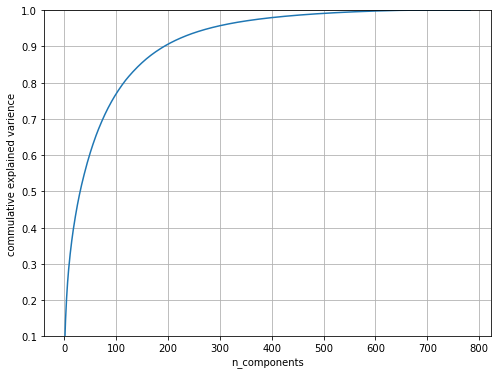

In [58]:
plt.figure(figsize=(8, 6))
plt.plot(cum_var_explained)
plt.grid()
plt.ylim(0.1,1)
plt.xlabel('n_components')
plt.ylabel('commulative explained varience')
plt.show()